<a href="https://colab.research.google.com/github/rohinish404/learning_pytorch/blob/master/cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)
     

2.0.0+cu118
0.15.1+cu118


In [3]:
first_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [26]:

from torchvision import datasets
train_data = datasets.CIFAR10(
    root = "data",
    train=True,
    download=True,
    transform=first_transform,
    target_transform=None
)
test_data = datasets.CIFAR10(
    root = "data",
    train=False,
    download=True,
    transform=first_transform,
    target_transform=None
)
 

Files already downloaded and verified
Files already downloaded and verified


In [27]:
len(train_data),len(test_data)

(50000, 10000)

In [28]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
image1, label1 = train_data[0]
image1, label1
     

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

(-0.5, 31.5, 31.5, -0.5)

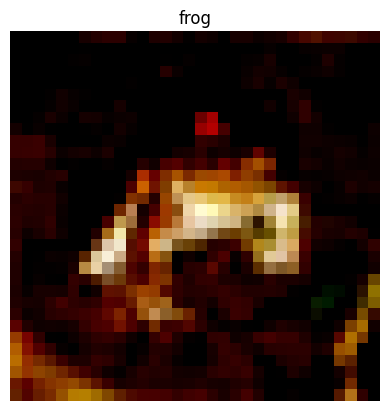

In [30]:
plt.imshow(image1.squeeze(dim=0).permute(1,2,0))
plt.title(classes[label1])
plt.axis(False)

In [31]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [32]:
len(train_dataloader)

1563

In [33]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 3, 32, 32])

In [34]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape

torch.Size([3, 1024])

In [44]:
import torch
from torch import nn

class CIFARModelV1(nn.Module):
  def __init__(self,input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*8*8,
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [45]:
torch.manual_seed(42)
model_1 = CIFARModelV1(input_shape=3,
                              hidden_units=10,
                              output_shape=len(classes)
                              )
     

In [46]:
model_1

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [47]:
img,label = train_features_batch[0],train_labels_batch[0]
img.shape

torch.Size([3, 32, 32])

In [48]:
rand_image_tensor = torch.randn(size=(3,32,32))
model_1(rand_image_tensor.unsqueeze(0))

tensor([[-0.0632, -0.0633, -0.0042, -0.0175,  0.0455, -0.0195, -0.0302, -0.0788,
          0.0230, -0.0267]], grad_fn=<AddmmBackward0>)

In [49]:
model_1

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [50]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [51]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
  
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [53]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss /= len(train_dataloader)
  test_loss,test_acc = 0,0 
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test,y_pred = test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)  

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))  




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.16209 | Test loss: 1.97811, Test acc: 29.05%

Epoch:1
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.73918 | Test loss: 1.61895, Test acc: 42.09%

Epoch:2
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.52209 | Test loss: 1.44005, Test acc: 47.86%

Train time on cpu: 208.527 seconds


In [56]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss /= len(train_dataloader)
  test_loss,test_acc = 0,0 
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test,y_pred = test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)  

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))  



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.41314 | Test loss: 1.37225, Test acc: 51.07%

Epoch:1
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.34177 | Test loss: 1.37401, Test acc: 50.48%

Epoch:2
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.27721 | Test loss: 1.23550, Test acc: 56.24%

Epoch:3
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.21706 | Test loss: 1.28400, Test acc: 54.88%

Epoch:4
------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 1.16688 | Test loss: 1.15224, Test acc: 58.91%

Train time on cpu: 345.125 seconds


In [57]:
train_loss

tensor(1.1669, grad_fn=<DivBackward0>)

In [58]:
test_loss

tensor(1.1522)